In [1]:
!pip install scikit-learn

In [2]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

# Import the numpy and pandas package

import numpy as np
import pandas as pd

# Data Visualisation
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
advertising = pd.DataFrame(pd.read_csv("/content/Advertising Budget and Sales.csv"))
advertising.head()

,Unnamed: 0,TV Ad Budget ($),Radio Ad Budget ($),Newspaper Ad Budget ($),Sales ($)
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


## Data Inspection

In [4]:
advertising.shape

(200, 5)

In [5]:
advertising.describe()

,Unnamed: 0,TV Ad Budget ($),Radio Ad Budget ($),Newspaper Ad Budget ($),Sales ($)
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


In [6]:
# Checking Null values
advertising.isnull().sum()*100/advertising.shape[0]
# There are no NULL values in the dataset, hence it is clean.

,0
Unnamed: 0,0.0
TV Ad Budget ($),0.0
Radio Ad Budget ($),0.0
Newspaper Ad Budget ($),0.0
Sales ($),0.0


In [7]:
# Outlier Analysis


# Exploratory Data Analysis

In [8]:
# Let's see how Sales are related with other variables using scatter plot.


In [9]:
# Let's see the correlation between different variables.
advertising.corr()
plt.show()

In [10]:
X = advertising['TV Ad Budget ($)']
y = advertising['Sales ($)']

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, test_size = 0.3, random_state = 100)

In [12]:
import statsmodels.api as sm

In [13]:
# Add a constant to get an intercept  # y = mx + c
X_train_sm = sm.add_constant(X_train)

# Fit the resgression line using 'OLS'
lr = sm.OLS(y_train, X_train_sm).fit()

In [14]:
# Print the parameters, i.e. the intercept and the slope of the regression line fitted
lr.params

,0
const,6.989666
TV Ad Budget ($),0.046497


In [15]:
# Performing a summary operation lists out all the different parameters of the regression line fitted
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:              Sales ($)   R-squared:                       0.613
Model:                            OLS   Adj. R-squared:                  0.611
Method:                 Least Squares   F-statistic:                     219.0
Date:                Sun, 07 Sep 2025   Prob (F-statistic):           2.84e-30
Time:                        14:32:41   Log-Likelihood:                -370.62
No. Observations:                 140   AIC:                             745.2
Df Residuals:                     138   BIC:                             751.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                6.9897      0.548  

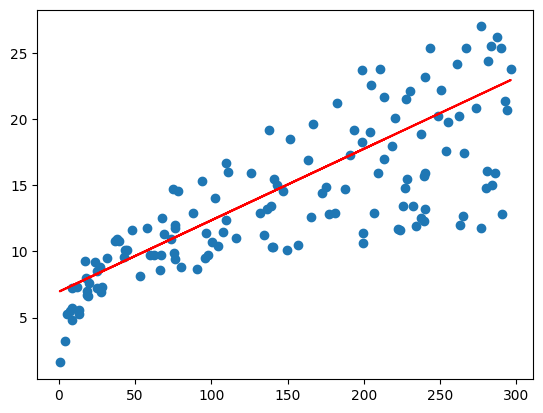

In [16]:
plt.scatter(X_train, y_train)
plt.plot(X_train, 6.948 + 0.054*X_train, 'red')
plt.show()

In [17]:
# Add a constant to X_test
X_test_sm = sm.add_constant(X_test)

# Predict the y values corresponding to X_test_sm
y_pred = lr.predict(X_test_sm)

In [18]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [19]:
#Returns the mean squared error; we'll take a square root
np.sqrt(mean_squared_error(y_test, y_pred))

np.float64(2.8241456288327003)

In [20]:
r_squared = r2_score(y_test, y_pred)
r_squared

0.5942987267783303

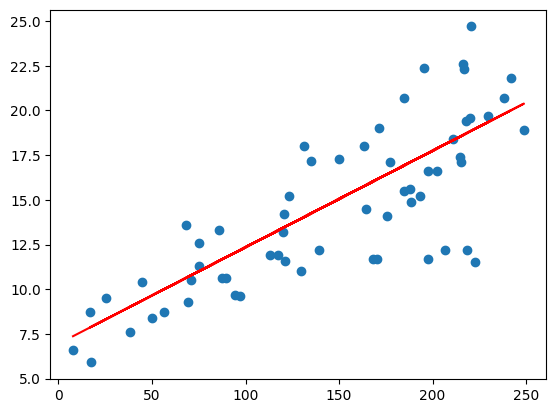

In [21]:
plt.scatter(X_test, y_test)
plt.plot(X_test, 6.948 + 0.054 * X_test, 'r')
plt.show()